In [12]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML


DMD_dir = r"D:\DATA\Patterns\Patt_2023-11-06\DMD"
DMD_images = []

# list all the files in the DMD_dir
DMD_files = os.listdir(DMD_dir)
sorted_file_names = sorted(DMD_files, key=lambda x: int(x.split(".")[0]))
DMD_images = []

# create the DMD_images array
for filen in sorted_file_names:
    if filen.endswith(".bmp"):
        # read the image and append
        image = cv2.imread(os.path.join(DMD_dir, filen), cv2.IMREAD_GRAYSCALE)
        DMD_images.append(image)
        # print the size the DMD_images array
print(len(DMD_images), " :", filen, image.shape)

170  : 170.bmp (1140, 912)


In [ ]:
# Animate all the cells in the DMD_images array
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


num_frames = len(DMD_images)
# Create a figure and axis
fig, ax = plt.subplots()

# Function to update the displayed image
def update(frame):
    ax.clear()
    ax.imshow(DMD_images[frame], cmap='gray')
    ax.set_title(f'Frame {frame + 1}/{num_frames}')

# Create an animation object
animation = FuncAnimation(fig, update, frames=num_frames, interval=100)  # Change the interval as needed (in milliseconds)

# Display the animation in the notebook
display(HTML(animation.to_jshtml()))


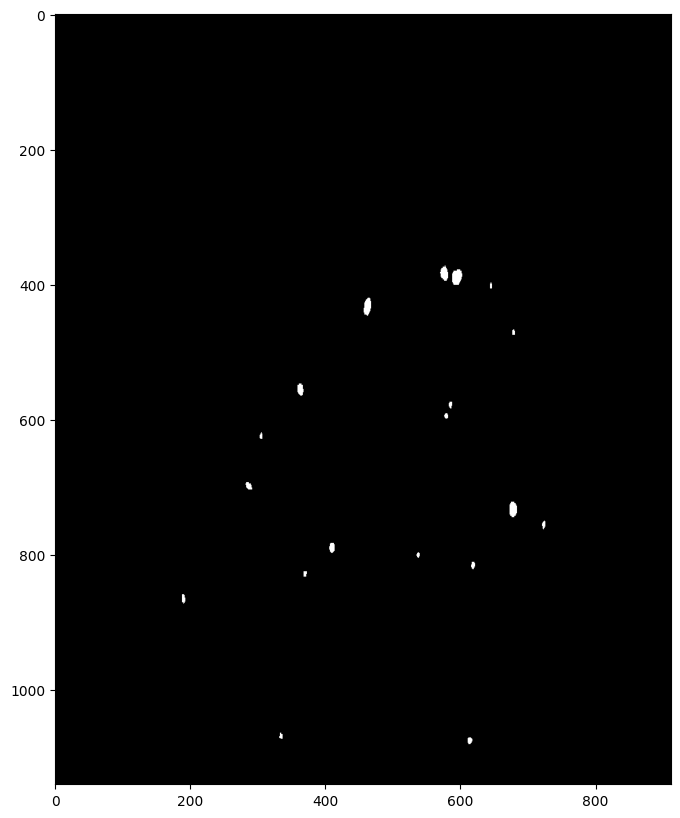

In [18]:
# Display sum image of random cells

summed_image = np.zeros_like(DMD_images[0])
num_images_to_display = 20
# pick random num_images_to_display from the length of DMD_images array
random_images = np.random.choice(len(DMD_images), num_images_to_display)

for _ in range(num_images_to_display):
    summed_image += DMD_images[random_images[_]]

plt.figure(figsize=(10, 10))
plt.imshow(summed_image, cmap="gray")
plt.show()


In [35]:
# create random groups of images

import random

# Number of objects (n) and group size (m)
n = len(DMD_images)  # Change this to the number of your objects
m = 10 # number of cells in each group

# Create a list of unique objects (e.g., numbers, strings, or any objects)
objects = list(range(1, n + 1))  # Replace this with your list of objects

# Calculate the number of groups (n/m)
num_groups = n // m

# Create random groups
random.shuffle(objects)  # Shuffle the list of objects randomly

groups = []
for i in range(num_groups):
    group = random.sample(objects, m) # Pick m objects randomly
    groups.append(group)
    for item in group:
        objects.remove(item)  # Remove items from the main list

# Handle remaining objects if any
if objects:
    groups.append(objects)

# Display the groups
for i, group in enumerate(groups, start=1):
    print(f"Group {i}: {group}")
    print(min(group), " : ", max(group))
    




Group 1: [105, 99, 167, 146, 51, 38, 122, 151, 6, 168]
6  :  168
Group 2: [85, 24, 141, 142, 58, 25, 150, 3, 110, 120]
3  :  150
Group 3: [20, 28, 27, 89, 159, 157, 68, 79, 31, 62]
20  :  159
Group 4: [117, 87, 22, 64, 15, 98, 55, 121, 163, 73]
15  :  163
Group 5: [13, 132, 72, 118, 71, 84, 9, 129, 33, 8]
8  :  132
Group 6: [29, 34, 112, 113, 93, 130, 57, 136, 83, 124]
29  :  136
Group 7: [149, 158, 140, 115, 81, 4, 156, 169, 21, 7]
4  :  169
Group 8: [42, 126, 147, 125, 37, 54, 107, 154, 162, 76]
37  :  162
Group 9: [17, 96, 164, 48, 2, 65, 128, 1, 50, 74]
1  :  164
Group 10: [111, 53, 148, 155, 109, 16, 161, 56, 139, 88]
16  :  161
Group 11: [45, 103, 95, 145, 144, 35, 91, 67, 137, 90]
35  :  145
Group 12: [153, 143, 43, 61, 80, 40, 101, 75, 70, 52]
40  :  153
Group 13: [102, 165, 26, 36, 127, 66, 39, 108, 134, 166]
26  :  166
Group 14: [59, 46, 14, 131, 104, 63, 18, 49, 114, 152]
14  :  152
Group 15: [69, 138, 47, 106, 23, 44, 170, 19, 5, 78]
5  :  170
Group 16: [10, 77, 160, 11, 10

In [ ]:
# create summed images for each group
summed_images = []
for group in groups:
    summed_image = np.zeros_like(DMD_images[0])
    for n in group:
        #print(n)
        summed_image += DMD_images[n-1]
    summed_images.append(summed_image)

# display the summed images in animation
num_frames = len(summed_images)
# Create a figure and axis
fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    ax.imshow(summed_images[frame], cmap='gray')
    ax.set_title(f'Frame {frame + 1}/{num_frames}')

# Create an animation object
animation = FuncAnimation(fig, update, frames=num_frames, interval=200)  # Change the interval as needed (in milliseconds)

# Display the animation in the notebook
display(HTML(animation.to_jshtml()))

